In [1]:
# %load ./import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!ls ./Data

Baseball96.xlsx  Countryregion.xlsx  Grocery.xlsx  USmacrodata.xls
Cardata.xlsx	 Fizzy.xlsx	     Oreos.xlsx


In [2]:
from ols_diag import ols_diag

#### 2.       For 12 straight weeks, you have observed the sales (in number of cases) of canned tomatoes at Mr. D’s Supermarket. (See the fi le Grocery.xlsx.) Each week, you keep track of the following:

a. Was a promotional notice for canned tomatoes placed in all shopping carts?

b. Was a coupon for canned tomatoes given to each customer?

c. Was a price reduction (none, 1, or 2 cents off) given?

Use this data to determine how the preceding factors influence sales. Predict sales of canned tomatoes during a week in which you use a shopping cart notice, a coupon, and reduce price by 1 cent.

In [3]:
gr=pd.read_excel("./Data/Grocery.xlsx",header=0)
gr.head()

,Week,Cart Notice?,Coupon?,Price Reduction?,Sales
0,1,Yes,Yes,0,36
1,2,Yes,Yes,1,38
2,3,Yes,Yes,2,40
3,4,Yes,No,0,40
4,5,Yes,No,1,42


In [4]:
gr.columns

Index(['Week', 'Cart Notice?', 'Coupon?', 'Price Reduction?', 'Sales'], dtype='object')

#### Converitng columns to dummy-------------------

In [5]:
gr_dum_col=['Cart Notice?', 'Coupon?', 'Price Reduction?']
grr=pd.get_dummies(gr, prefix_sep='_', dummy_na=False, columns=gr_dum_col,  drop_first=True,)
grr.head()

,Week,Sales,Cart Notice?_Yes,Coupon?_Yes,Price Reduction?_1,Price Reduction?_2
0,1,36,1,1,0,0
1,2,38,1,1,1,0
2,3,40,1,1,0,1
3,4,40,1,0,0,0
4,5,42,1,0,1,0


In [6]:
grr.columns

Index(['Week', 'Sales', 'Cart Notice?_Yes', 'Coupon?_Yes',
       'Price Reduction?_1', 'Price Reduction?_2'],
      dtype='object')

In [7]:
y_2=grr[["Sales"]]
X_2=grr[['Cart Notice?_Yes', 'Coupon?_Yes',
       'Price Reduction?_1', 'Price Reduction?_2']]

* Perfroming OLS now

In [8]:
X_2=sm.add_constant(X_2)
model_2=sm.OLS(y_2,X_2).fit()
model_2.summary()

/home/boo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     13.70
Date:                Tue, 30 Apr 2019   Prob (F-statistic):            0.00201
Time:                        03:51:45   Log-Likelihood:                -33.865
No. Observations:                  12   AIC:                             77.73
Df Residuals:                       7   BIC:                             80.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.5000      3.438      4.217      0.004       6.370      22.630
Cart Notice?_Yes      20.1667      3.075      6.558      0.000      12.895      27.438
Coupon?_Yes           -1.1667      3.075     -0.379      0.716      -8.438       6.105
Price Reduction?_1     5.0000      3.766      1.328      0.226      -3.906      13.906
Price Reduction?_2    12.7500      3.766      3.385      0.012       3.844      21.656
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                0.845
Skew:                          -0.209   Prob(JB):                        0.655
Kurtosis:                       1.769   Cond. No.                         4.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dataset: 	 12
X: 	 12
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Good
Reason: Residual Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Good
Reason: Data have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Good
Reason: Data have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Good
Reason: Data are not related to themself:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-----------------------------------------------
Mode select

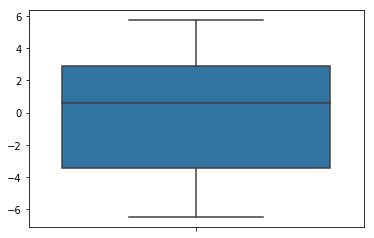

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

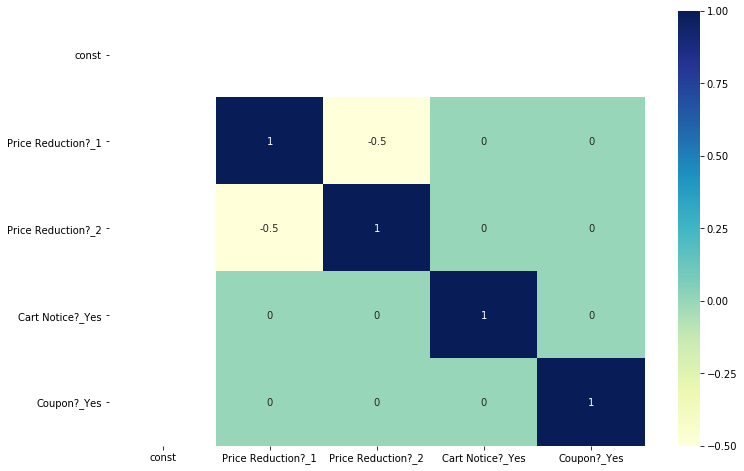

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [9]:
ols_diag(grr,X_2, model_2)

In [10]:
model_2.params

const                 14.500000
Cart Notice?_Yes      20.166667
Coupon?_Yes           -1.166667
Price Reduction?_1     5.000000
Price Reduction?_2    12.750000
dtype: float64

In [11]:
sales=model_2.params[0] \
+model_2.params[1]*1 \
+model_2.params[2]*1 \
+model_2.params[3]*0 \
+model_2.params[4]*2

sales=sales.round(2)

#### And 2:

* We predict that:

In [12]:
print("Sales in which we use a shopping cart notice, a coupon, and reduce price by 1 cent is",sales,"$")

Sales in which we use a shopping cart notice, a coupon, and reduce price by 1 cent is 59.0 $
